In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import random
test_arr = [random.random() * 2 - 1 for _ in range(44100)]

In [ ]:
test_arr = np.linspace(0, 2, 44100*2)
freq = 100
x = 44100/freq

if x % 1 != 0:
    x = round(x + 0.5)
test_arr = test_arr[:int(x)]
test_arr = np.sin(test_arr * freq * 2 * np.pi )


plt.style.use('seaborn-dark')
plt.plot(test_arr)
plt.savefig('foo.png')


In [ ]:
import json

with open('Json-lib/user_data.json', 'r+') as file:
    file_data = json.load(file)

    file_data['user-waves'].update({'hello' : 5, 'jiojio' : 5})
    file.seek(0)

    json.dump(file_data, file, indent=4)

Test stuff for FFT

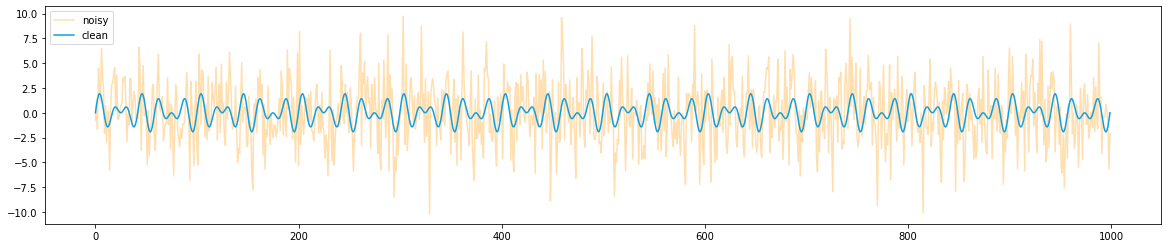

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 4]

t = np.linspace(0, 1, 1000)
f_arr = (np.sin(2 * np.pi * t * 50)) + (np.sin(2 * np.pi * t * 70))
f_noisy = f_arr + 3 * np.random.randn(len(t))

plt.plot(f_noisy, color='#ffdfaf', label='noisy')
plt.plot(f_arr, color='#11a0df', label='clean')
plt.legend()

70


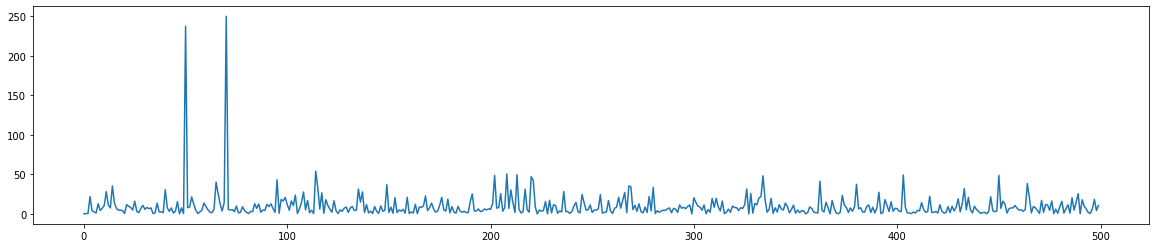

In [14]:
# FFT Computation

n = len(t)

f_hat = np.fft.fft(f_noisy)
PSD = (f_hat * np.conj(f_hat)) / n

PSD = PSD[:n//2]
# Get a good filtering algorithm

PSD = np.real(PSD)

print(np.argmax(PSD))
plt.plot(PSD)
plt.plot(np.argmax(PSD))
# plt.plot(PSD - np.gradient(PSD))

In [1]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib tk

SAMPLE_RATE = 44100

CHUNK = 1024 * 4
CHANNELS = 1

FORMAT = pyaudio.paInt16

audio = pyaudio.PyAudio()

stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=SAMPLE_RATE,
                    input=True,
                    output=True,
                    frames_per_buffer=CHUNK)

fig, (ax, ax2) = plt.subplots(2)
# fig, ax = plt.subplots()

x = np.arange(0, 2*CHUNK, 2)
line, = ax.plot(x, np.random.rand(CHUNK))
line_fft, = ax2.plot(x, np.random.randn(CHUNK))
ax.set_ylim(-2**15, 2**15)
ax.set_xlim(0, CHUNK)

ax2.set_ylim(0, 1000)
ax2.set_xlim(20, CHUNK)

while True:
    data = stream.read(CHUNK)
    data_np = np.frombuffer(data, dtype=np.int16)

    line.set_ydata(data_np)
    y_fft = np.fft.fft(data_np)

    PSD = (y_fft * np.conj(y_fft)) / len(y_fft)
    line_fft.set_ydata(np.real(PSD[:CHUNK]) * 2 / (2 * CHUNK))
    # line_fft.set_ydata(np.real(y_fft[:CHUNK]))

    fig.canvas.draw()
    fig.canvas.flush_events()

    break

In [ ]:
# COMPUTER HOMEWORK LOL

In [1]:
# WAP to calculate the mean of a tuple

t1 = (1, 5, 3, 5, 7, 0, -4, 2)

print("Mean value of the elements in the tuple is:  ", sum(t1)/len(t1))

Mean value of the elements in the tuple is:   2.375


In [2]:
# WAP to show the max and min values of a tuple

t1 = (1, 5, 3, 5, 7, 0, -4, 2)

print("Max value is: ", max(t1), "and min value is: ", min(t1))

Max value is:  7 and min value is:  -4


In [4]:
# WAP to evaluate the frequency of a number in a tuple

num = int(input("Enter a number"))
print("Number input is", num)

print(t1.count(num))

Number input is 5
2
